# Definitions

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from scipy import stats

from const import data_path, target_name, id_name, random_seed

# Data

In [2]:
train = pd.read_csv(data_path.joinpath('train.csv'))
train.head()

,Year_Factor,State_Factor,building_class,facility_type,floor_area,year_built,energy_star_rating,ELEVATION,january_min_temp,january_avg_temp,...,days_above_80F,days_above_90F,days_above_100F,days_above_110F,direction_max_wind_speed,direction_peak_wind_speed,max_wind_speed,days_with_fog,site_eui,id
0,1,State_1,Commercial,Grocery_store_or_food_market,61242.0,1942.0,11.0,2.4,36,50.5,...,14,0,0,0,1.0,1.0,1.0,NaN,248.682615,0
1,1,State_1,Commercial,Warehouse_Distribution_or_Shipping_center,274000.0,1955.0,45.0,1.8,36,50.5,...,14,0,0,0,1.0,NaN,1.0,12.0,26.500150,1
2,1,State_1,Commercial,Retail_Enclosed_mall,280025.0,1951.0,97.0,1.8,36,50.5,...,14,0,0,0,1.0,NaN,1.0,12.0,24.693619,2
3,1,State_1,Commercial,Education_Other_classroom,55325.0,1980.0,46.0,1.8,36,50.5,...,14,0,0,0,1.0,NaN,1.0,12.0,48.406926,3
4,1,State_1,Commercial,Warehouse_Nonrefrigerated,66000.0,1985.0,100.0,2.4,36,50.5,...,14,0,0,0,1.0,1.0,1.0,NaN,3.899395,4


In [3]:
train.shape

(75757, 64)

In [4]:
test = pd.read_csv(data_path.joinpath('test.csv'))
test.head()

,Year_Factor,State_Factor,building_class,facility_type,floor_area,year_built,energy_star_rating,ELEVATION,january_min_temp,january_avg_temp,...,days_below_0F,days_above_80F,days_above_90F,days_above_100F,days_above_110F,direction_max_wind_speed,direction_peak_wind_speed,max_wind_speed,days_with_fog,id
0,7,State_1,Commercial,Grocery_store_or_food_market,28484.0,1994.0,37.0,2.4,38,50.596774,...,0,29,5,2,0,NaN,NaN,NaN,NaN,75757
1,7,State_1,Commercial,Grocery_store_or_food_market,21906.0,1961.0,55.0,45.7,38,50.596774,...,0,29,5,2,0,NaN,NaN,NaN,NaN,75758
2,7,State_1,Commercial,Grocery_store_or_food_market,16138.0,1950.0,1.0,59.1,38,50.596774,...,0,29,5,2,0,NaN,NaN,NaN,NaN,75759
3,7,State_1,Commercial,Grocery_store_or_food_market,97422.0,1971.0,34.0,35.4,38,50.596774,...,0,29,5,2,0,NaN,NaN,NaN,NaN,75760
4,7,State_1,Commercial,Grocery_store_or_food_market,61242.0,1942.0,35.0,1.8,38,50.596774,...,0,29,5,2,0,340.0,330.0,22.8,126.0,75761


In [5]:
test.shape

(9705, 63)

# Target distribution

(array([5.8861e+04, 1.4647e+04, 1.4560e+03, 4.3700e+02, 1.4800e+02,
        7.5000e+01, 5.6000e+01, 3.6000e+01, 2.1000e+01, 2.0000e+01]),
 array([  1.0011693 , 100.68766439, 200.37415948, 300.06065457,
        399.74714966, 499.43364475, 599.12013984, 698.80663493,
        798.49313002, 898.17962511, 997.8661202 ]),
 <BarContainer object of 10 artists>)

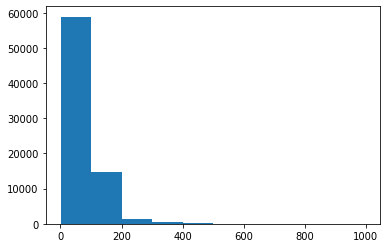

In [6]:
plt.hist(train.site_eui)

(array([  101.,   302.,   622.,  1517.,  5786., 17356., 42098.,  6674.,
         1094.,   207.]),
 array([1.16861890e-03, 6.91613669e-01, 1.38205872e+00, 2.07250377e+00,
        2.76294882e+00, 3.45339387e+00, 4.14383892e+00, 4.83428397e+00,
        5.52472902e+00, 6.21517407e+00, 6.90561912e+00]),
 <BarContainer object of 10 artists>)

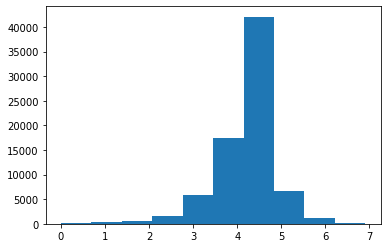

In [7]:
plt.hist(np.log(train.site_eui))

In [8]:
log_target = np.log(train.site_eui)

In [9]:
mean = np.mean(log_target)
mean

4.222042763518751

In [10]:
std = np.std(log_target)
std

0.6720654262321862

In [11]:
np.random.seed(random_seed)

In [17]:
train[target_name].mean(), np.exp(mean)

(82.5846926362212, 68.17260265376233)

# Get "Prediction"

(array([   3.,   26.,  183.,  967., 2309., 2965., 2169.,  858.,  201.,
          24.]),
 array([1.30434086, 1.838778  , 2.37321513, 2.90765227, 3.44208941,
        3.97652654, 4.51096368, 5.04540081, 5.57983795, 6.11427508,
        6.64871222]),
 <BarContainer object of 10 artists>)

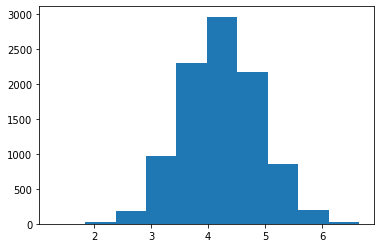

In [12]:
log_prediction = np.random.normal(loc=mean, scale=std, size=len(test))
plt.hist(log_prediction)

(array([5.793e+03, 2.859e+03, 7.000e+02, 2.290e+02, 8.100e+01, 1.900e+01,
        1.300e+01, 8.000e+00, 1.000e+00, 2.000e+00]),
 array([  3.68525921,  80.49571206, 157.3061649 , 234.11661775,
        310.9270706 , 387.73752345, 464.5479763 , 541.35842915,
        618.168882  , 694.97933485, 771.7897877 ]),
 <BarContainer object of 10 artists>)

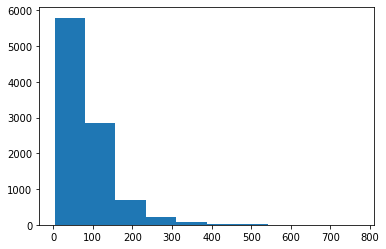

In [13]:
prediction = np.exp(log_prediction)
plt.hist(prediction)

In [18]:
test[target_name] = np.exp(mean)

# Submition

In [19]:
test[[id_name, target_name]]

,id,site_eui
0,75757,68.172603
1,75758,68.172603
2,75759,68.172603
3,75760,68.172603
4,75761,68.172603
...,...,...
9700,85457,68.172603
9701,85458,68.172603
9702,85459,68.172603
9703,85460,68.172603


In [20]:
test[[id_name, target_name]].to_csv(data_path.joinpath('submition.csv'), index=False)